In [ ]:
import pandas as pd
import requests
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

# Set your OpenWeatherMap API key
api_key = 'a954eb68a53c2cb94e368339f63a2e71'

# Set the location for which you want to retrieve weather data
lat = 18.184135
lon = 74.610764

# Construct the API URL
api_url = f"http://api.openweathermap.org/data/2.5/forecast?lat={lat}&lon={lon}&appid={api_key}"

res = requests.get(api_url)
weather_data['list'][0]

weather_data = res.json()
weather_data

weather_data.keys()
weather_data['list'][0]
temperature = weather_data['list'][0]['main']['temp']
temperature

# Creating a dataFrame to working 
arr = []
date = []
weather = []
wind = []
for i in weather_data["list"]:
    date.append(i['dt'])
    arr.append(i['main'])
    weather.append(i['weather'][0]['main'])
    wind.append(i['wind']['speed'])
    
db = pd.DataFrame(arr)
db['time'] = pd.to_datetime(date, unit='s')
db['weather'] = weather
db['wind_speed'] = wind

db.head()




In [2]:
import pandas as pd
import requests
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

# Set your OpenWeatherMap API key
api_key = 'a954eb68a53c2cb94e368339f63a2e71'

# Set the location for which you want to retrieve weather data
lat = 18.184135
lon = 74.610764

# Construct the API URL
api_url = f"http://api.openweathermap.org/data/2.5/forecast?lat={lat}&lon={lon}&appid={api_key}"

In [3]:
res = requests.get(api_url)

In [8]:
weather_data = res.json()
weather_data
weather_data['list'][0]


{'dt': 1699023600,
 'main': {'temp': 298.95,
  'feels_like': 298.6,
  'temp_min': 298.95,
  'temp_max': 298.95,
  'pressure': 1011,
  'sea_level': 1011,
  'grnd_level': 948,
  'humidity': 39,
  'temp_kf': 0},
 'weather': [{'id': 801,
   'main': 'Clouds',
   'description': 'few clouds',
   'icon': '02n'}],
 'clouds': {'all': 13},
 'wind': {'speed': 1.19, 'deg': 177, 'gust': 1.49},
 'visibility': 10000,
 'pop': 0,
 'sys': {'pod': 'n'},
 'dt_txt': '2023-11-03 15:00:00'}

In [9]:
weather_data = res.json()
weather_data

weather_data.keys()

weather_data['list'][0]

temperature = weather_data['list'][0]['main']['temp']
temperature

298.95

In [10]:
weather_data["list"][0]['wind']

{'speed': 1.19, 'deg': 177, 'gust': 1.49}

In [11]:
# Creating a dataFrame to working 
arr = []
date = []
weather = []
wind = []
for i in weather_data["list"]:
    date.append(i['dt'])
    arr.append(i['main'])
    weather.append(i['weather'][0]['main'])
    wind.append(i['wind']['speed'])

In [18]:
db = pd.DataFrame(arr)
db['time'] = pd.to_datetime(date, unit='s')
db['weather'] = weather
db['wind_speed'] = wind
db.set_index('time', inplace=True)

db.head()

,temp,feels_like,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,temp_kf,weather,wind_speed
time,,,,,,,,,,,
2023-11-03 15:00:00,298.95,298.60,298.95,298.95,1011,1011,948,39,0.00,Clouds,1.19
2023-11-03 18:00:00,298.55,298.19,297.75,298.55,1011,1011,948,40,0.80,Clouds,2.85
2023-11-03 21:00:00,296.77,296.36,295.68,296.77,1011,1011,947,45,1.09,Clouds,2.25
2023-11-04 00:00:00,294.30,293.85,294.30,294.30,1011,1011,947,53,0.00,Clouds,2.17
2023-11-04 03:00:00,297.62,297.35,297.62,297.62,1014,1014,950,47,0.00,Clouds,2.79


In [19]:
#Calculate average temperature
db['temp'].mean()

# Calculating max and min values
db['temp'].max()
db['temp'].min()

294.28

In [20]:
plt.plot(db['time'], db['temp'])

KeyError: 'time'

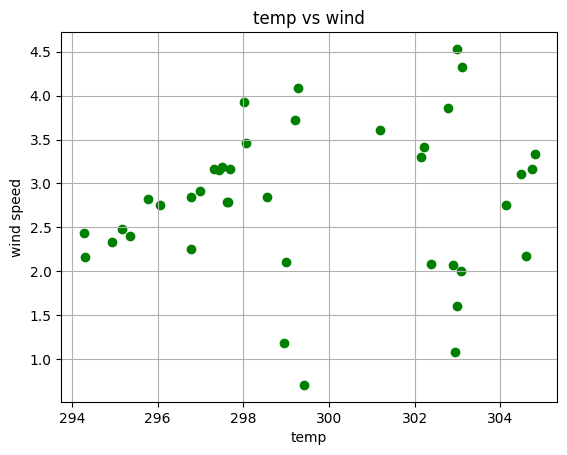

In [21]:
plt.scatter(db['temp'], db['wind_speed'] ,c='g')
plt.title("temp vs wind")
plt.xlabel("temp")
plt.ylabel('wind speed')
plt.grid()
plt.show()

<AxesSubplot: ylabel='time'>

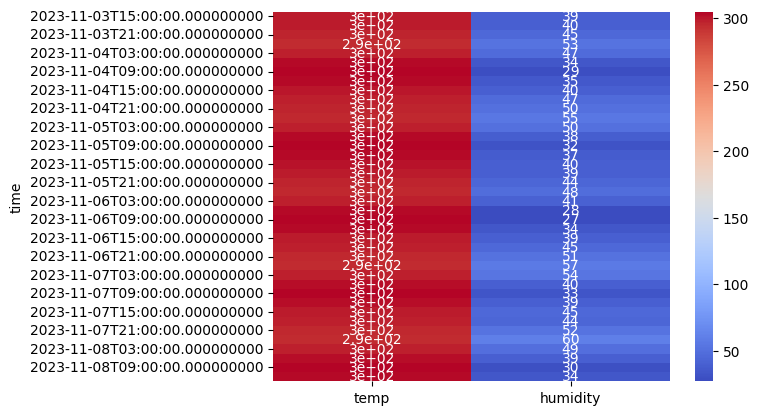

In [22]:
# Heatmap
heat_db = db[['temp', 'humidity']]
sns.heatmap(heat_db, cmap='coolwarm', annot=True)
# 

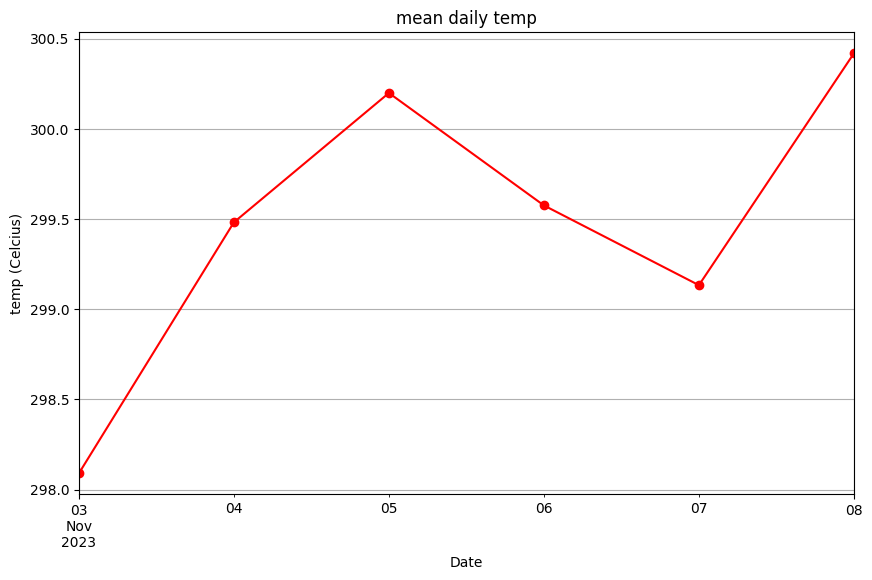

In [24]:
daily_mean_temp = db['temp'].resample('D').mean()
daily_mean_humidity = db['humidity'].resample('D').mean()
daily_mean_wind_speed = db['wind_speed'].resample('D').mean()
plt.figure(figsize=(10,6))

daily_mean_temp.plot(color='red',marker="o",linestyle='-')
plt.title("mean daily temp")
plt.xlabel("Date")
plt.ylabel("temp (Celcius)")
plt.grid()
plt.show()
